## Loader les données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import PlaintextCorpusReader
from os import path
import glob

#can be removed
from jupyterthemes import jtplot
jtplot.style()

In [2]:
if not path.exists("raw_data.csv"):
    data_path = "reddit-dataset/data"
    all_files = glob.glob(data_path + "/*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        # only keep x rows per file
        df = df[0:3000]
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame.to_csv("raw_data.csv", index=False)

In [3]:
df = pd.read_csv("raw_data.csv")
df

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,10,11,2,3,4,5,6,7,8,9,Unnamed: 0
0,NaN,466jwy,1.0,NaN,startrek,television,1455683402.0,JesseBotwin,1.0,0.0,2257.0,937.0,0
1,that sounds awesome i ll check it out tonight ...,d027xk0,0.0,NaN,startrek,television,1455650159.0,notheebie,1.0,0.0,307.0,26352.0,1
2,star trek tos 50th anniversary tribute game n...,463gry,0.0,NaN,startrek,television,1455643118.0,thisoldfart,3.0,0.0,3811.0,878.0,2
3,would nt spock have found it a bit insulting ...,461kw5,0.0,NaN,startrek,television,1455611558.0,FPSD,18.0,0.0,1.0,1486.0,3
4,also what is a soul,d01pqtn,0.0,NaN,startrek,television,1455611836.0,Realik,2.0,0.0,16429.0,14192.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,tastes like tobacco,d01kpyh,0.0,NaN,tf2,gaming,1.4556e+09,Sentient545,5,0.0,1168.0,21241.0,2995
149996,http iimgurcombc26ygif,d01bp1k,0.0,NaN,tf2,gaming,1.45558e+09,Rhymes_with_ike,13,0.0,11134.0,26374.0,2996
149997,https wikiteamfortresscomwimagesff2spy_taunts...,d01mbjk,0.0,NaN,tf2,gaming,1.4556e+09,KourageousBagel,3,0.0,276.0,622.0,2997
149998,it s an oldie but it s a hell of a goodie,d01puwj,0.0,NaN,tf2,gaming,1.45561e+09,--Benson,3,0.0,1.0,3576.0,2998


In [4]:
#rename columns
df = df.rename(columns={"0": "text", "2": "subreddit", "3":"label"})

#only keep important columns
df = df[["text", "subreddit" ,"label"]]

# remove empty texts
df = df[(df["text"] != " removed ") & (df["text"] != " deleted ") & (df["text"] != np.nan)]

# remove NAN values
df = df.dropna()

# only keep at least 10 words per item
df = df[df["text"].str.count(' ') > 10]

# drop duplicates
df = df.drop_duplicates(subset="text")
df

,text,subreddit,label
1,that sounds awesome i ll check it out tonight ...,startrek,television
2,star trek tos 50th anniversary tribute game n...,startrek,television
3,would nt spock have found it a bit insulting ...,startrek,television
5,spock was half human and had worked for some t...,startrek,television
6,i got a notice from audible this afternoon tha...,startrek,television
...,...,...,...
149009,regular model https wikiteamfortresscomwim...,tf2,gaming
149010,my friend gave me a strange killstreak version...,tf2,gaming
149011,so i m pretty sad to know that the bottle does...,tf2,gaming
149013,fun fact if you die with the neon annihilator...,tf2,gaming


In [5]:
df["label"].value_counts()

gaming           6653
lifestyle        5155
news             4346
television       4126
learning         3824
humor            3359
entertainment    1282
Name: label, dtype: int64

In [6]:
labels = pd.get_dummies(df["label"],prefix='cat')
labels

,cat_entertainment,cat_gaming,cat_humor,cat_learning,cat_lifestyle,cat_news,cat_television
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
149009,0,1,0,0,0,0,0
149010,0,1,0,0,0,0,0
149011,0,1,0,0,0,0,0
149013,0,1,0,0,0,0,0


In [7]:
data = df["text"].values

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
data_tokens = df["text"].apply(lambda x: tknzr.tokenize(x)).values

In [9]:
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.corpus import stopwords

In [10]:
class Preprocessor:
    def __init__(self, stem=True, punctuation=True, digit=True):
        self.st = SnowballStemmer("french", ignore_stopwords=True)
        self.punctuations = set(string.punctuation)
        self.stem = stem
        self.punctuation = punctuation
        self.digit = digit
    
    def raw_preprocess(self, token_list):
        new_token_list = []
        for token in token_list:
            is_token_valid = True
            token = token.lower()
            
            # stemming
            if self.stem:
                token = self.st.stem(token)

            # punctuation filtering
            if self.punctuation and token in self.punctuations:
                is_token_valid = False

            # digit filtering
            elif self.digit and token.isdigit():
                is_token_valid = False
                
            # link filtering
            elif token == "http" or token == "https" or token[:9] == "iimgurcom":
                is_token_valid = False
            # add token to new sub list
            if is_token_valid:
                new_token_list.append(token)
        return new_token_list
        

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

preprocessor = Preprocessor()
vectorizer = TfidfVectorizer(preprocessor=preprocessor.raw_preprocess ,tokenizer=identity_tokenizer)
IDF_data = vectorizer.fit_transform(data_tokens)
IDF_data

<28745x46223 sparse matrix of type '<class 'numpy.float64'>'
	with 1019451 stored elements in Compressed Sparse Row format>

In [200]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, algorithm='randomized', n_iter=100)
svd.fit(IDF_data)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=100,
             random_state=None, tol=0.0)

In [201]:
sum(svd.explained_variance_)

0.48486291055700637

In [202]:
SVD_data = svd.transform(IDF_data)

## Même approche que le tp2

Knn

In [203]:
y_data = labels.values

In [204]:
X_data = SVD_data

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=32)

In [206]:
print(len(X_train))
print(len(X_test))

20121
8624


In [207]:
y_train[2]

array([0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)

y_scores = knn_classifier.predict_proba(X_test)

In [209]:
y_pred = knn_classifier.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.29185992578849723

In [ ]:
accuracies = []
n_neighbors = []
for i in range (1, 50, 2):
    print("k = " + str(i), "\r")
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    n_neighbors.append(i)
    

In [ ]:
accuracies

## Deep learning

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

W1128 18:30:47.648602 139673847871168 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [25]:
from nltk.util import ngrams
from collections import defaultdict
from os import linesep

def build_voc(corpus):
    
    word_dict = {}

    for document in corpus:
        for word in document:
            if word not in word_dict:
                word_dict[word] = len(word_dict) + 1 # + 1 pcq 0 = padding
                
    with open("./vocab.txt", "w") as f:
        for word in word_dict.keys():
            f.write(word + "\n")
        
    return word_dict

In [26]:
def split_items(list_of_strings):
    stripped_strings = []
    for string in list_of_strings:
        stripped_strings.append(string.split(' '))
    return stripped_strings

In [27]:
splited_data = split_items(data)

In [28]:
splited_data[1]

['star',
 'trek',
 'tos',
 '',
 '50th',
 'anniversary',
 'tribute',
 'game',
 'needs',
 'beta',
 'feedback',
 '',
 'download',
 'here',
 '',
 'http',
 '',
 'gambitrealmcominstallerdownload_release45_vrphp',
 '',
 '',
 'features',
 '',
 '',
 '',
 '',
 'all',
 'decks',
 'exploration',
 'mission',
 '',
 'entire',
 'ship',
 'accessible',
 '',
 '',
 '15',
 'training',
 'missions',
 '',
 'goldredblue',
 'shirts',
 'each',
 'get',
 '5',
 'skill',
 'tiers',
 '',
 '',
 '5',
 'interactive',
 'episodes',
 '',
 'watch',
 'clips',
 'and',
 'then',
 'take',
 'control',
 'of',
 'the',
 'action',
 '',
 '',
 'turbolift',
 'shafts',
 'exploration',
 'mission',
 '',
 'go',
 'from',
 'top',
 'to',
 'bottom',
 'of',
 'ship',
 'within',
 'the',
 'shafts',
 '',
 '',
 'deck',
 '6',
 'movie',
 'theater',
 'mission',
 '',
 'watch',
 'movie',
 'trailers',
 'in',
 'the',
 'theater',
 '',
 '',
 'full',
 'oculus',
 'rift',
 'support',
 '',
 'dk1',
 'tested',
 '',
 '',
 'full',
 'game',
 'controller',
 'support',
 '

In [29]:
vocab = build_voc(splited_data)

In [30]:
vocab

{'that': 1,
 'sounds': 2,
 'awesome': 3,
 'i': 4,
 'll': 5,
 'check': 6,
 'it': 7,
 'out': 8,
 'tonight': 9,
 'hope': 10,
 'has': 11,
 'voice': 12,
 'support': 13,
 'so': 14,
 'can': 15,
 'say': 16,
 '': 17,
 'engage': 18,
 'haha': 19,
 'star': 20,
 'trek': 21,
 'tos': 22,
 '50th': 23,
 'anniversary': 24,
 'tribute': 25,
 'game': 26,
 'needs': 27,
 'beta': 28,
 'feedback': 29,
 'download': 30,
 'here': 31,
 'http': 32,
 'gambitrealmcominstallerdownload_release45_vrphp': 33,
 'features': 34,
 'all': 35,
 'decks': 36,
 'exploration': 37,
 'mission': 38,
 'entire': 39,
 'ship': 40,
 'accessible': 41,
 '15': 42,
 'training': 43,
 'missions': 44,
 'goldredblue': 45,
 'shirts': 46,
 'each': 47,
 'get': 48,
 '5': 49,
 'skill': 50,
 'tiers': 51,
 'interactive': 52,
 'episodes': 53,
 'watch': 54,
 'clips': 55,
 'and': 56,
 'then': 57,
 'take': 58,
 'control': 59,
 'of': 60,
 'the': 61,
 'action': 62,
 'turbolift': 63,
 'shafts': 64,
 'go': 65,
 'from': 66,
 'top': 67,
 'to': 68,
 'bottom': 69,


In [31]:
vocab_size = len(vocab)
vocab_size

54629

In [32]:
def get_max_sentence_length(corpus):
    return max([len(sentence) for sentence in corpus])

In [33]:
def get_number_vectors(X):
    return [[vocab[word] for word in sentence] for sentence in X]

In [891]:
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

max_sentence_length = get_max_sentence_length(splited_data)
print("max sentence length: ", max_sentence_length)

def get_padded_sequences(X):
    return pad_sequences(sequences=get_number_vectors(X),
                         padding='post',
                         maxlen=max_sentence_length)

def get_padded_sequences_max(X, max_len):
    return pad_sequences(sequences=get_number_vectors(X),
                         padding='post',
                         maxlen=max_len)

padded_data = get_padded_sequences(splited_data)

max sentence length:  10000


In [892]:
# fix max length of sequences
padded_data = get_padded_sequences_max(splited_data, 100)

In [893]:
#using padded raw data from tf
X_train, X_test, y_train, y_test = train_test_split(padded_data, y_data, test_size=0.3, random_state=32)

# using svd data from earlier
#X_train, X_test, y_train, y_test = train_test_split(SVD_data, y_data, test_size=0.3, random_state=32)

# using tf-idf data
#X_train, X_test, y_train, y_test = train_test_split(IDF_data, y_data, test_size=0.3, random_state=32)

In [1095]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size + 1, 32))
model.add(keras.layers.GlobalAveragePooling1D())

model.add(keras.layers.Dense(16, activation=tf.nn.relu))

model.add(keras.layers.Dense(7, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, None, 32)          1748160   
_________________________________________________________________
global_average_pooling1d_26  (None, 32)                0         
_________________________________________________________________
dense_383 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_384 (Dense)            (None, 7)                 119       
Total params: 1,748,807
Trainable params: 1,748,807
Non-trainable params: 0
_________________________________________________________________


In [1096]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [1097]:
partial_x_train, x_validation, partial_y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=32)

In [1098]:
sum_y = [0 for i in range(7)]
sum_y

[0, 0, 0, 0, 0, 0, 0]

In [1099]:
for entry in y_test:
    sum_y = sum_y + entry
sum_y

array([ 369, 1986, 1010, 1192, 1536, 1280, 1251])

In [1100]:
print("proportion classe majoritaire: " + str((max(sum_y)/sum(sum_y))))

proportion classe majoritaire: 0.23028756957328386


In [1101]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=64,
                   validation_data=(x_validation, y_validation),
                   verbose=1)

Train on 14084 samples, validate on 6037 samples
Epoch 1/20
14084/14084 [==============================] - 7s 518us/sample - loss: 1.8918 - acc: 0.2337 - val_loss: 1.8585 - val_acc: 0.2281
Epoch 2/20
14084/14084 [==============================] - 4s 286us/sample - loss: 1.8390 - acc: 0.2349 - val_loss: 1.8279 - val_acc: 0.2433
Epoch 3/20
14084/14084 [==============================] - 4s 283us/sample - loss: 1.7865 - acc: 0.2906 - val_loss: 1.7615 - val_acc: 0.2940
Epoch 4/20
14084/14084 [==============================] - 4s 285us/sample - loss: 1.6498 - acc: 0.3638 - val_loss: 1.5947 - val_acc: 0.4178
Epoch 5/20
14084/14084 [==============================] - 4s 285us/sample - loss: 1.4389 - acc: 0.4915 - val_loss: 1.4432 - val_acc: 0.5084
Epoch 6/20
14084/14084 [==============================] - 4s 289us/sample - loss: 1.2601 - acc: 0.5812 - val_loss: 1.3319 - val_acc: 0.5478
Epoch 7/20
14084/14084 [==============================] - 4s 289us/sample - loss: 1.1128 - acc: 0.6421 - val_lo

In [1102]:
results = model.evaluate(X_test, y_test)

print(results)

8624/8624 [==============================] - 1s 151us/sample - loss: 1.0919 - acc: 0.6438
[1.0919268056059148, 0.64378476]


In [1103]:
results

[1.0919268056059148, 0.64378476]

In [1104]:
X_test

array([[ 1060,   308,  1081, ...,     0,     0,     0],
       [  563,  2870,     1, ...,     0,     0,     0],
       [33841,   288,   178, ...,     0,     0,     0],
       ...,
       [  119,   906,   151, ...,     0,     0,     0],
       [36278,    17,    17, ...,    17,  2476,    17],
       [ 6311,   191,   119, ...,     0,     0,     0]], dtype=int32)

In [1105]:
preds = model.predict_classes(X_test)
pred_dict = {}
for pred in preds:
    if pred not in pred_dict:
        pred_dict[pred] = 1
    else:
        pred_dict[pred] += 1
print(sum_y)
sorted(pred_dict.items())

[ 369 1986 1010 1192 1536 1280 1251]


[(0, 190), (1, 2245), (2, 1087), (3, 1050), (4, 1524), (5, 1266), (6, 1262)]

In [1106]:
preds = model.predict(X_test)
preds

array([[3.9726496e-05, 1.8566847e-05, 6.4751506e-04, ..., 4.1300058e-04,
        3.8152933e-04, 2.6822090e-06],
       [3.1709671e-05, 1.8486381e-04, 1.6838312e-04, ..., 1.2606382e-05,
        3.3348799e-05, 4.7594309e-05],
       [9.9837780e-06, 2.3153424e-04, 8.8095665e-05, ..., 4.1931868e-05,
        4.2170286e-05, 2.1725893e-05],
       ...,
       [2.7105808e-03, 1.4809847e-02, 6.4700842e-05, ..., 0.0000000e+00,
        0.0000000e+00, 9.3688172e-01],
       [0.0000000e+00, 9.9987626e-01, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.9414892e-05],
       [7.6383352e-05, 2.0265579e-06, 1.1456013e-04, ..., 6.5296888e-05,
        2.0746231e-02, 6.2584877e-07]], dtype=float32)

In [1107]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [1108]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

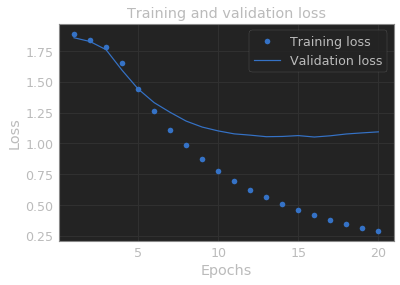

In [1109]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

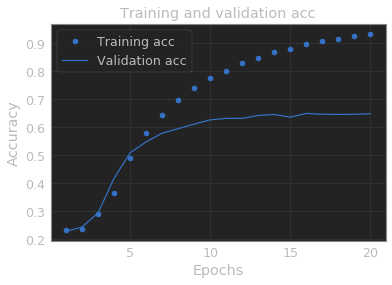

In [1110]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()